# Intento de preparar imagen para cargar en FPGA

In [105]:
# import cv2
# import numpy as np

In [106]:
# line = cv2.imread('linea.png')
# gray = cv2.cvtColor(line, cv2.COLOR_BGR2GRAY).astype(np.uint8)

In [107]:
# with open("line.mem", "x") as f:
#     for row in gray:
#         for pixel in row:
#             f.write(hex(pixel)[2:] + '\n')

# Procesamiento end-to-end con Python

In [108]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
from functions import *
from skimage.transform import hough_line, hough_line_peaks
import imutils

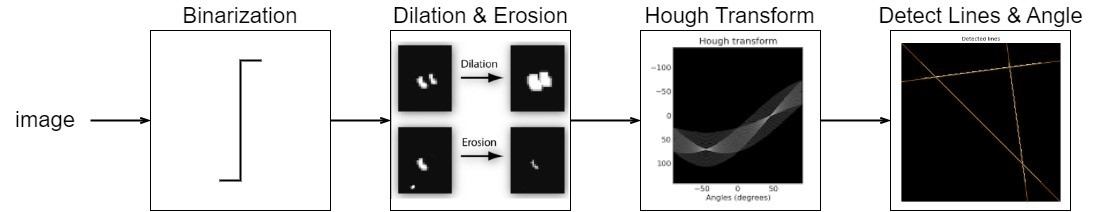

In [109]:
blocks = cv2.imread('imgs/blocks.jpg')
h,w = blocks.shape[:2]
displayImage_fromcv2(img=blocks, w=w, h=h)

#### Load test image in grayscale

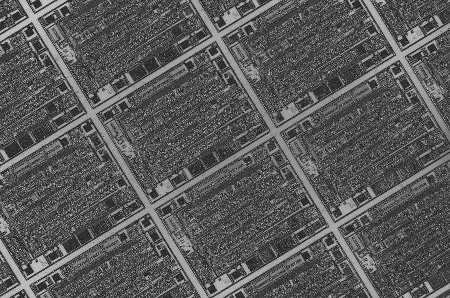

In [110]:
wafer = cv2.imread('imgs/testwafer_1.jpg')
h,w = wafer.shape[:2]
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
displayImage_fromcv2(img=wafer, w=w//2, h=h//2)

#### Binarization block

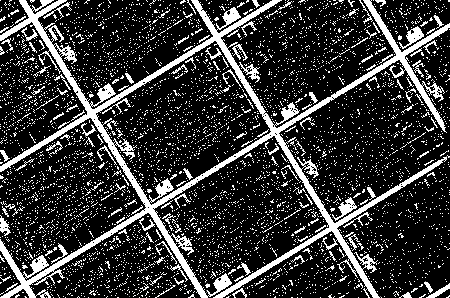

In [111]:
wafer_bin = binary_mask(img=wafer, threshold=127)   # Threshold selection criteria pending
displayImage_fromcv2(img=wafer_bin, w=w//2, h=h//2)

#### Dilation and Erosion Block

Study optimal choice for n in both steps

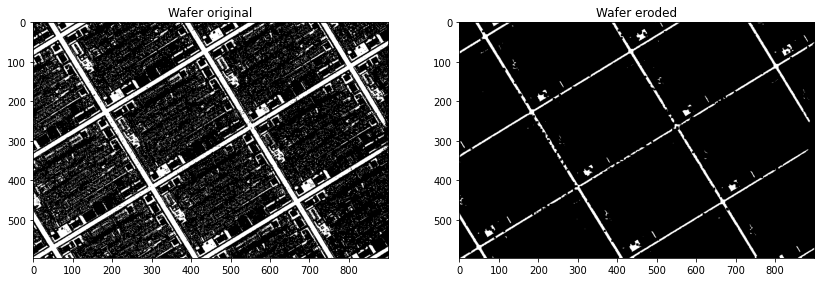

In [112]:
n_erode = 5
kernel_erode = np.ones((n_erode, n_erode), np.uint8)
wafer_eroded = cv2.erode(wafer_bin, kernel_erode) 
images = {'Wafer original':wafer_bin,
          'Wafer eroded': wafer_eroded
        }
compare(images)

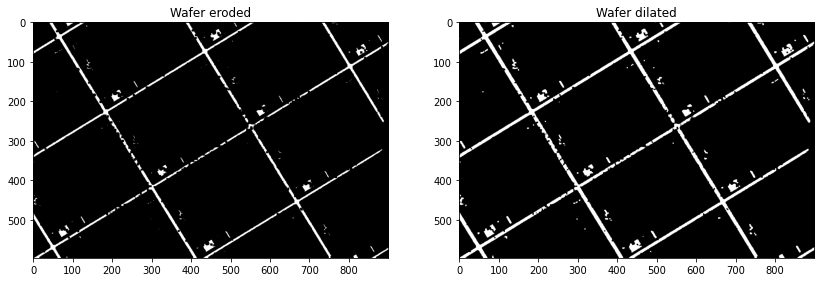

In [113]:
n_dilate = 3
kernel_dilate = np.ones((n_dilate, n_dilate), np.uint8)
wafer_dilated = cv2.dilate(wafer_eroded, kernel_dilate) 
images = {'Wafer eroded':wafer_eroded,
          'Wafer dilated': wafer_dilated
        }
compare(images)

In [114]:
wafer_processed = wafer_dilated

#### Hough Transform Block

Angulo: -31.17318°
Angulo: -121.67598°
Angulo: -121.67598°
Angulo: -31.17318°
Angulo: -31.17318°


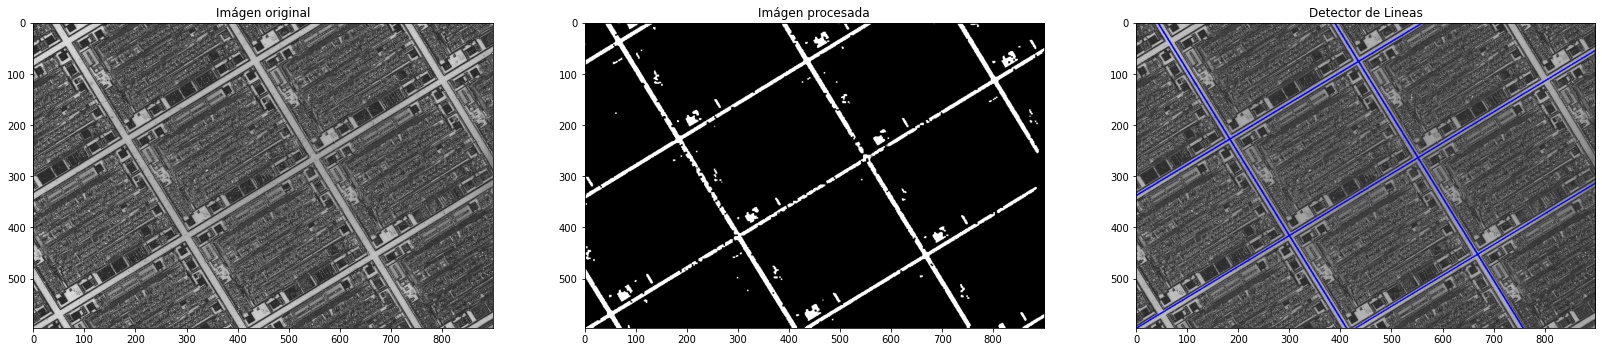

In [115]:
# Hough transform and lines drawing
# ---------------------------------
tested_angles = np.linspace(-np.pi/2,np.pi/2,180)
hspace, theta, dist = hough_line(wafer_processed, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


angle_list=[]  #Create an empty list to capture all angles

origin = np.array((0, wafer_processed.shape[1]))

wafer_lines = cv2.cvtColor(wafer, cv2.COLOR_GRAY2RGB)

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    texto = f'Angulo: {np.round((angle*180/np.pi)-90,5)}°'
    print(texto)
    cv2.line(wafer_lines,(origin[0],int(y0)),(origin[1],int(y1)),(0,0,255),2)

images = {'Imágen original':wafer,
          'Imágen procesada':wafer_processed,
          'Detector de Lineas':wafer_lines
        }

compare(images, size=(28,20))

***

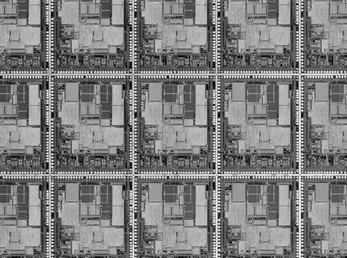

In [116]:
wafer = cv2.imread('imgs/testwafer_2.png')
h,w = wafer.shape[:2]
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
displayImage_fromcv2(img=wafer, w=w, h=h)

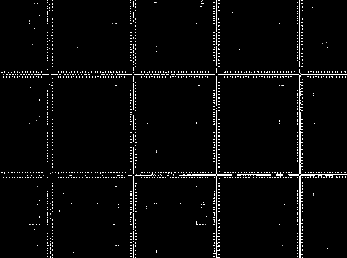

In [117]:
wafer_bin = binary_mask(img=wafer, threshold=195)   # Threshold selection criteria pending
displayImage_fromcv2(img=wafer_bin, w=w, h=h)

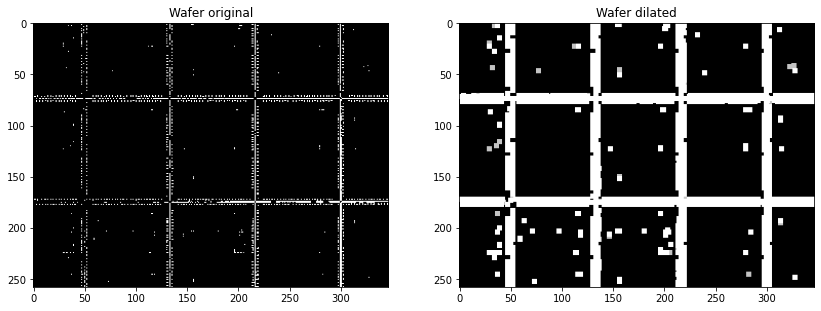

In [118]:
n_dilate = 5
kernel_dilate = np.ones((n_dilate, n_dilate), np.uint8)
wafer_dilated = cv2.dilate(wafer_bin, kernel_dilate) 
images = {'Wafer original':wafer_bin,
          'Wafer dilated': wafer_dilated
        }
compare(images)

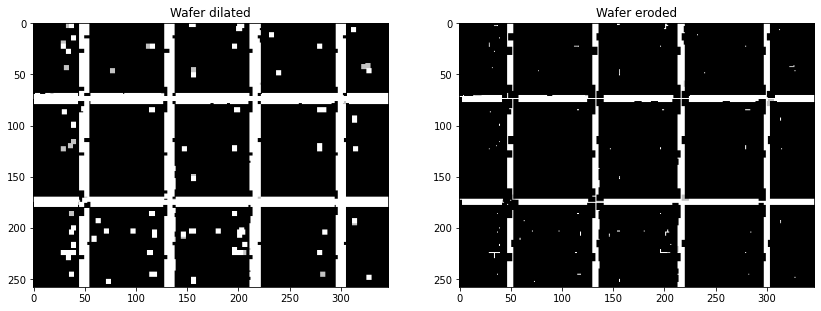

In [119]:
n_erode = 5
kernel_erode = np.ones((n_erode, n_erode), np.uint8)
wafer_eroded = cv2.erode(wafer_dilated, kernel_erode) 
images = {'Wafer dilated':wafer_dilated,
          'Wafer eroded': wafer_eroded
        }
compare(images)

In [120]:
wafer_processed = wafer_eroded

Angulo: 0.0°
Angulo: 0.0°
Angulo: -90.50279°
Angulo: -90.50279°
Angulo: -90.50279°
Angulo: -90.50279°


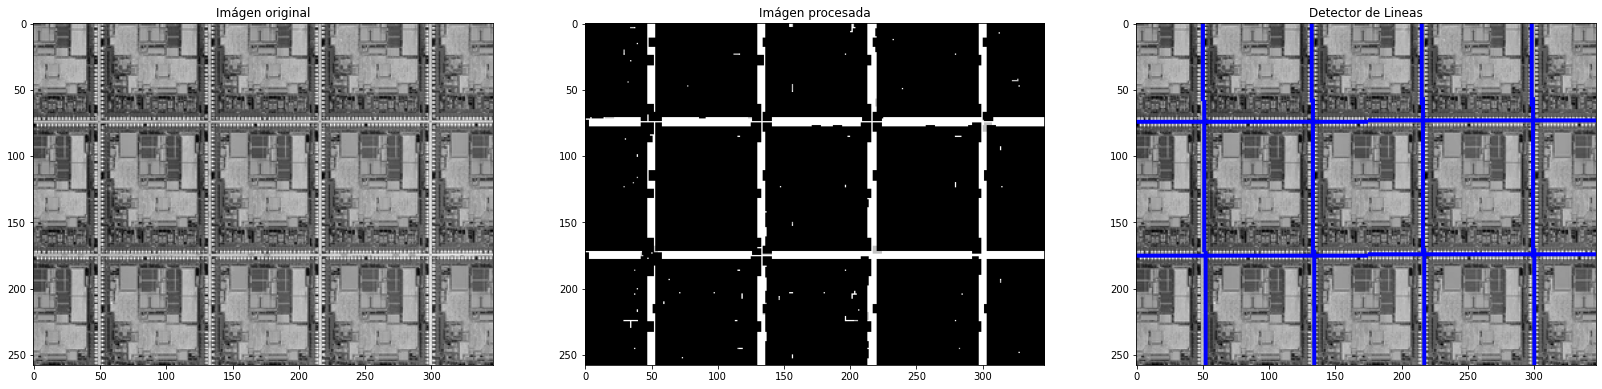

In [121]:
# Hough transform and lines drawing
# ---------------------------------
tested_angles = np.linspace(-np.pi/2,np.pi/2,180)
hspace, theta, dist = hough_line(wafer_processed, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


angle_list=[]  #Create an empty list to capture all angles

origin = np.array((0, wafer_processed.shape[1]))

wafer_lines = cv2.cvtColor(wafer, cv2.COLOR_GRAY2RGB)

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    texto = f'Angulo: {np.round((angle*180/np.pi)-90,5)}°'
    print(texto)
    cv2.line(wafer_lines,(origin[0],int(y0)),(origin[1],int(y1)),(0,0,255),2)

images = {'Imágen original':wafer,
          'Imágen procesada':wafer_processed,
          'Detector de Lineas':wafer_lines
        }

compare(images, size=(28,20))

***

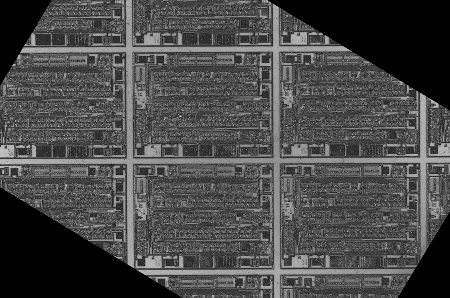

In [138]:
wafer = cv2.imread('imgs/testwafer_1.jpg')
h,w = wafer.shape[:2]
wafer = cv2.cvtColor(wafer, cv2.COLOR_BGR2GRAY).astype(np.uint8)
wafer = imutils.rotate(wafer, angle=-31.17318)
displayImage_fromcv2(img=wafer, w=w//2, h=h//2)

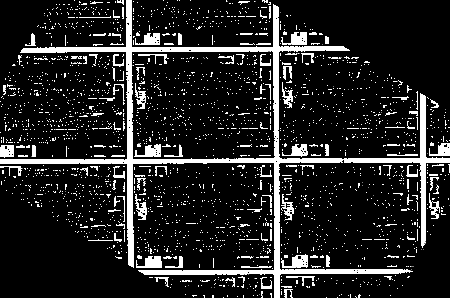

In [140]:
wafer_bin = binary_mask(img=wafer, threshold=127)   # Threshold selection criteria pending
displayImage_fromcv2(img=wafer_bin, w=w//2, h=h//2)

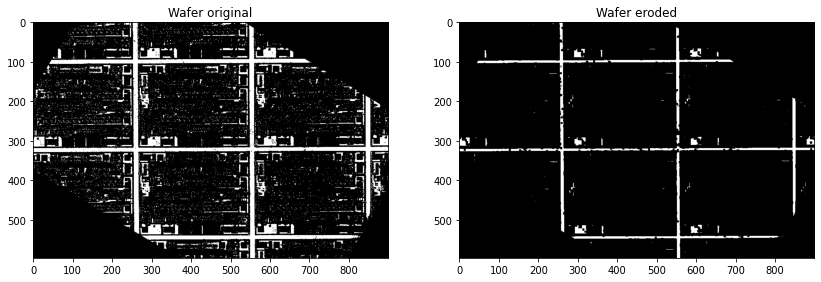

In [141]:
n_erode = 5
kernel_erode = np.ones((n_erode, n_erode), np.uint8)
wafer_eroded = cv2.erode(wafer_bin, kernel_erode) 
images = {'Wafer original':wafer_bin,
          'Wafer eroded': wafer_eroded
        }
compare(images)

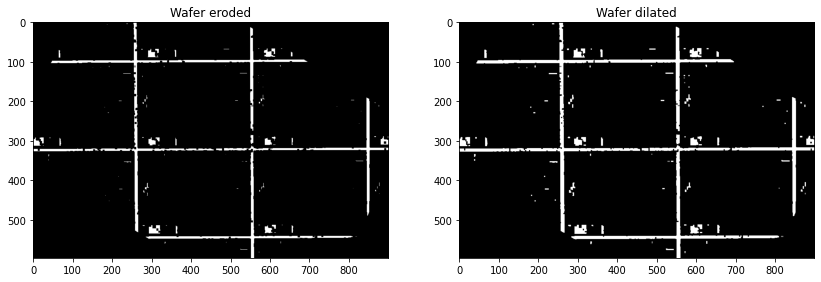

In [142]:
n_dilate = 3
kernel_dilate = np.ones((n_dilate, n_dilate), np.uint8)
wafer_dilated = cv2.dilate(wafer_eroded, kernel_dilate) 
images = {'Wafer eroded':wafer_eroded,
          'Wafer dilated': wafer_dilated
        }
compare(images)

In [143]:
wafer_processed = wafer_dilated

Angulo: 0.0°
Angulo: 0.0°
Angulo: -90.50279°
Angulo: 0.0°
Angulo: -90.50279°


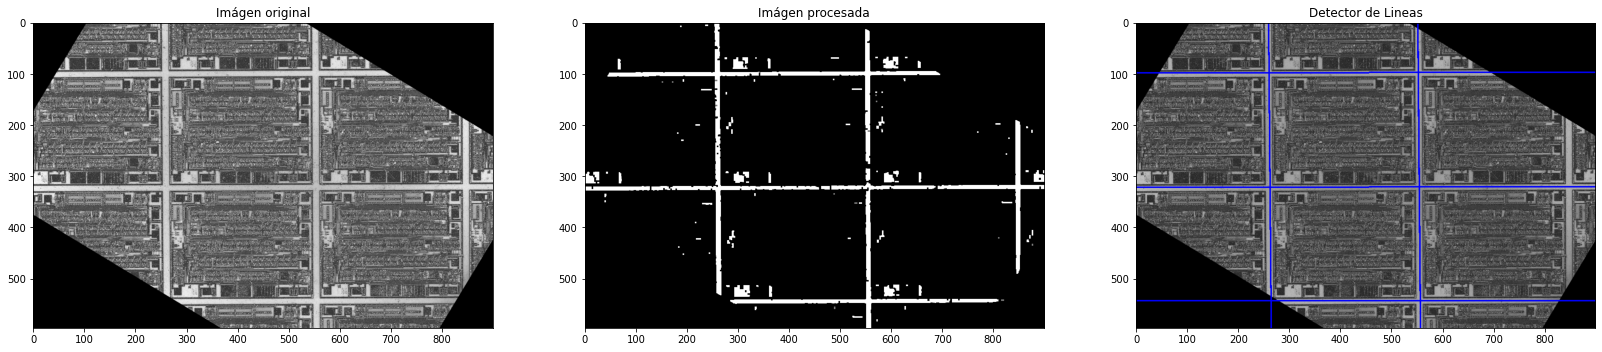

In [144]:
# Hough transform and lines drawing
# ---------------------------------
tested_angles = np.linspace(-np.pi/2,np.pi/2,180)
hspace, theta, dist = hough_line(wafer_processed, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


angle_list=[]  #Create an empty list to capture all angles

origin = np.array((0, wafer_processed.shape[1]))

wafer_lines = cv2.cvtColor(wafer, cv2.COLOR_GRAY2RGB)

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    texto = f'Angulo: {np.round((angle*180/np.pi)-90,5)}°'
    print(texto)
    cv2.line(wafer_lines,(origin[0],int(y0)),(origin[1],int(y1)),(0,0,255),2)

images = {'Imágen original':wafer,
          'Imágen procesada':wafer_processed,
          'Detector de Lineas':wafer_lines
        }

compare(images, size=(28,20))